<a href="https://colab.research.google.com/github/Ferinarizky4/Random-Forest-to-Predict-Temperature-/blob/main/0.%20Percobaan%20RF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install basemap

In [ ]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [ ]:
data = pd.read_csv('/content/Data gabungan paling fix.csv', sep=';')

In [ ]:
data

,longitude,latitude,u10,v10,d2m,msl,sst,sp,t2m
0,94.00,-7.0,3.600056,-2.937379,297.79465,101084.260,302.06366,101086.060,28.24515
1,94.00,-7.0,7.414926,0.831597,297.30730,101113.430,302.25952,101114.984,27.95984
2,94.00,-7.0,3.756817,3.024742,296.69177,101128.625,302.18216,101130.984,28.57877
3,94.00,-7.0,3.647230,1.409731,296.59930,101127.510,302.31130,101129.760,28.64078
4,94.00,-7.0,2.429433,-0.900645,297.19824,101142.945,302.51346,101144.220,27.29697
...,...,...,...,...,...,...,...,...,...
795712,106.75,7.0,-7.701080,-9.126024,296.34300,101552.195,299.75806,101556.980,26.49728
795713,106.75,7.0,-7.856068,-8.507150,296.16922,101423.940,299.60720,101428.550,26.08310
795714,106.75,7.0,-7.321172,-7.089899,296.09560,101447.310,299.38232,101452.150,26.34530
795715,106.75,7.0,-6.180976,-4.982381,296.63754,101368.990,299.42560,101373.375,26.53850


In [ ]:
#temp is a labels
#fee is a features

In [ ]:
temp = data['t2m']
temp

0         28.24515
1         27.95984
2         28.57877
3         28.64078
4         27.29697
            ...   
795712    26.49728
795713    26.08310
795714    26.34530
795715    26.53850
795716    26.53668
Name: t2m, Length: 795717, dtype: float64

In [ ]:
fee = data.drop(columns=['t2m'])
fee

,longitude,latitude,u10,v10,d2m,msl,sst,sp
0,94.00,-7.0,3.600056,-2.937379,297.79465,101084.260,302.06366,101086.060
1,94.00,-7.0,7.414926,0.831597,297.30730,101113.430,302.25952,101114.984
2,94.00,-7.0,3.756817,3.024742,296.69177,101128.625,302.18216,101130.984
3,94.00,-7.0,3.647230,1.409731,296.59930,101127.510,302.31130,101129.760
4,94.00,-7.0,2.429433,-0.900645,297.19824,101142.945,302.51346,101144.220
...,...,...,...,...,...,...,...,...
795712,106.75,7.0,-7.701080,-9.126024,296.34300,101552.195,299.75806,101556.980
795713,106.75,7.0,-7.856068,-8.507150,296.16922,101423.940,299.60720,101428.550
795714,106.75,7.0,-7.321172,-7.089899,296.09560,101447.310,299.38232,101452.150
795715,106.75,7.0,-6.180976,-4.982381,296.63754,101368.990,299.42560,101373.375


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets
train_fee, test_fee, train_temp, test_temp = train_test_split(fee, temp, test_size = 0.35, random_state = 0)

In [ ]:
print('Training fee Shape:', train_fee.shape)
print('Training temp Shape:', train_temp.shape)
print('Testing fee Shape:', test_fee.shape)
print('Testing temp Shape:', test_temp.shape)

Training fee Shape: (517216, 8)
Training temp Shape: (517216,)
Testing fee Shape: (278501, 8)
Testing temp Shape: (278501,)


In [ ]:
train_fee1, test_fee1, train_temp1, test_temp1 = train_test_split(test_fee, test_temp, test_size = 0.35, random_state = 0)

In [ ]:
print('Training fee1 Shape:', train_fee1.shape)
print('Training temp1 Shape:', train_temp1.shape)
print('Testing fee1 Shape:', test_fee1.shape)
print('Testing temp1 Shape:', test_temp1.shape)

Training fee1 Shape: (181025, 8)
Training temp1 Shape: (181025,)
Testing fee1 Shape: (97476, 8)
Testing temp1 Shape: (97476,)


In [ ]:
# Import model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 350, random_state = 0)

In [ ]:
rf.fit(train_fee1, train_temp1);

In [ ]:
predictions = rf.predict(test_fee1)
print(len(predictions))

97476


In [ ]:
fee2 = np.asarray(test_fee1)
temp2 = np.asarray(test_temp1)

In [ ]:
errors = abs(predictions - test_temp1)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')

Mean Absolute Error: 0.46 %


In [ ]:
#mape
mape = 100*(errors/test_temp1)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2), '%')

Accuracy: 98.36 %


In [ ]:
errors = abs(predictions - test_temp1)
percenterror = np.mean(errors)
print('Mean Absolute Error:', round(percenterror, 2), 'degrees')

Mean Absolute Error: 0.46 degrees


In [ ]:
#MAE
mae = 100 * (errors/test_temp1)
accuracy = 100 - np.mean(errors)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 99.54 %


Text(0.5, 1.0, 'Temperatur Analysis Using Random Forest Calculation')

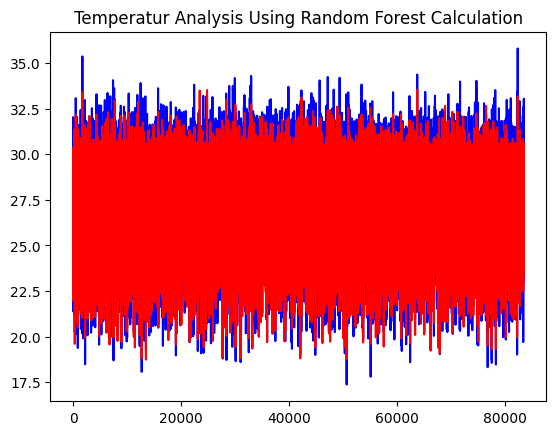

In [ ]:
plt.plot(temp2, 'b', label = 'Suhu Awal')
plt.plot(predictions, 'r', label = 'Prediksi Suhu')
plt.legend
plt.title('Temperatur Analysis Using Random Forest Calculation')

In [ ]:
lon = data.longitude
lat = data.latitude

In [ ]:
u_10 = data.u10
v_10 = data.v10

In [ ]:
wu = test_fee1.u10
wv = test_fee1.v10

In [ ]:
WS = np.sqrt(wu**2 + wv**2)

In [ ]:
print(WS.shape)

(31829,)


In [ ]:
lon1 = test_fee1['longitude']
lon2 = np.asarray(lon1)

lat1 = test_fee1['latitude']
lat2 = np.asarray(lat1)

Text(0.5, 1.0, 'Peta Suhu Awal Pulau Sumatera')

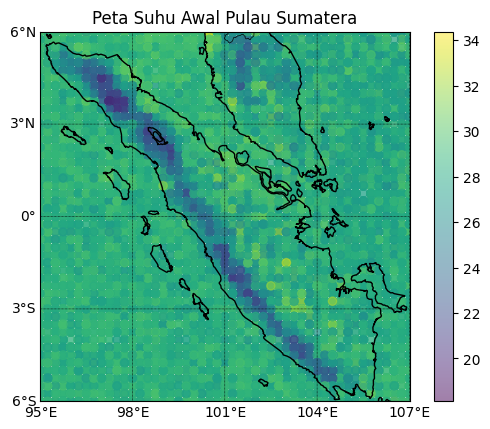

In [ ]:
m = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 107, urcrnrlat = 6, resolution = 'i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-6,6+0.25,3)
m.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
meridians = np.arange(95,107+0.25,3)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth = 0.5)

plt.scatter(lon2, lat2, c = temp2, alpha = 0.5)
plt.colorbar()
plt.title('Peta Suhu Awal Pulau Sumatera')

Text(0.5, 1.0, 'Peta Prediksi Suhu Pulau Sumatera')

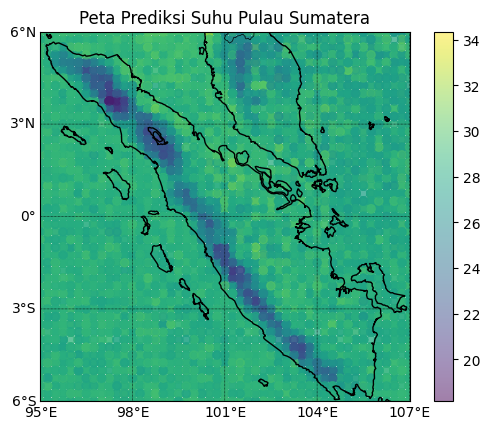

In [ ]:
m = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 107, urcrnrlat = 6, resolution = 'i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-6,6+0.25,3)
m.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
meridians = np.arange(95,107+0.25,3)
m.drawmeridians(meridians, labels = [0,0,0,1], linewidth = 0.5)

plt.scatter(lon2, lat2, c = predictions, alpha = 0.5)
plt.colorbar()
plt.title('Peta Prediksi Suhu Pulau Sumatera')

Text(0.5, 1.0, 'Peta Kecepatan Angin Sumatera')

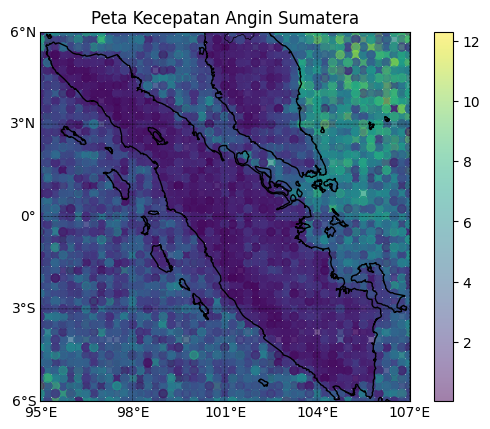

In [ ]:
m = Basemap(projection = 'cyl', llcrnrlon = 95, llcrnrlat = -6, urcrnrlon = 107, urcrnrlat = 6, resolution = 'i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-6,6+0.25,3)
m.drawparallels(parallels, labels = [1,0,0,0], linewidth = 0.5)
meridians = np.arange(95,107+0.25,3)
m.drawmeridians(meridians, labels = [0,0,0,1], linewidth  = 0.5)

plt.scatter(lon2, lat2, c = WS, alpha = 0.5)
plt.colorbar()
plt.title('Peta Kecepatan Angin Sumatera')